# Naive Bayes Classification
- Fast for both training and prediction
- Few tunable parameters
- Useful as a quick baseline Model for a classification problem

$$ P(Y|X) = \frac{P(X|Y)P(Y)}{P(X)} $$

$$ P(Label|Data) = \frac{P(Data|Label)P(Label)}{P(Data)} $$

---

## Gaussian Naive Bayes
- Assume that data from each label is drawn from Gaussian Distribution
- Model can be fit by finding the **Mean** and **Standard Deviation** of the points within each label

In [1]:
# Load packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

%matplotlib inline

In [2]:
# Get sample Data
X_train, y_train = make_blobs(n_samples=100, n_features=2, centers=2, random_state=2, cluster_std=1.5)
print(f"X train: \n {X_train[0:5]}")
print(f"y train: \n {y_train[0:5]}")

X train: 
 [[ 0.92141506 -9.98499137]
 [-5.26927614 -9.6186543 ]
 [-0.45292089 -6.04316334]
 [-0.0856312  -2.16867404]
 [ 1.53194956 -0.36022153]]
y train: 
 [0 0 0 1 1]


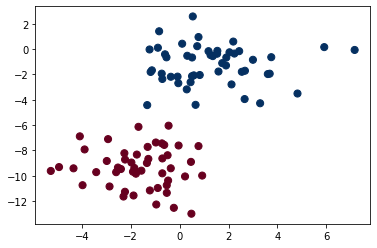

In [3]:
# Plot Training Data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='RdBu')

#### Use Gaussian Naive Bayes to predict on new Test Data

In [4]:
# Import GaussianNB 
from sklearn.naive_bayes import GaussianNB

# Generate new Test Data
rng = np.random.RandomState(0)
X_test = [-6, -14] + [14, 18] * rng.rand(2000, 2)

# Initiate Model, Train, Predict
model = GaussianNB()
model.fit(X_train, y_train);
y_pred = model.predict(X_test)

# Look at predictions
print(f"y pred: \n {y_pred}")

y pred: 
 [1 1 1 ... 0 1 1]


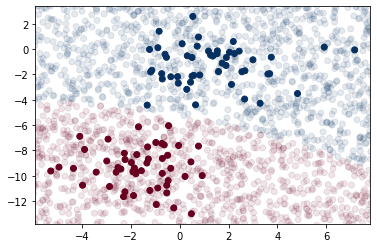

In [5]:
# Plot Test Data with Training Data to see decision boundary
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdBu')
lim = plt.axis()

# Plot new Test Data with transperancy
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='RdBu', alpha=0.1)
plt.axis(lim);

---

## Multinomial Naive Bayes
- Features are assumed to be generated from a simple multinomial distribution
- Appropriate for features that represent counts or count rates
- Model the data distribuiton with a best-fit multinomial distribution.

#### Classifying Text
- Convert the content of each string into a vector of numbers. 
- Use the TF-IDF vectorizer 
- Create a pipeline that attaches it to a multinomial naive Bayes classifier

In [6]:
# Download the data and take a look at the target names:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [7]:
# Select a few of the categories, and download the training and testing set:

categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [8]:
# Look at sample Data
print(f"Train Data: \n {train.data[5]}")
print(f"Train Target: \n {train.target[5]}")

Train Data: 
 From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.

Train Target: 
 3


In [9]:
# Make a Pipeline with TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [10]:
# Use Pipeline to Train and Predict
model.fit(train.data, train.target)
predictions = model.predict(test.data)

array([[344,  13,  32,   0],
       [  6, 364,  24,   0],
       [  1,   5, 392,   0],
       [  4,  12, 187,  48]])

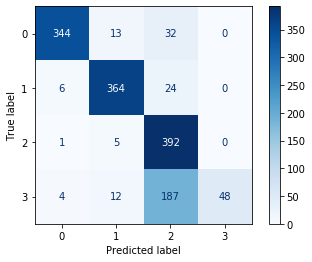

In [12]:
# Look at the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(model, test.data, test.target, cmap="Blues", values_format='.3g')
disp.confusion_matrix

---